Outcomes after 10000 simulations:
A: 3407
B: 3211
C: 3382
No dominant species: 0


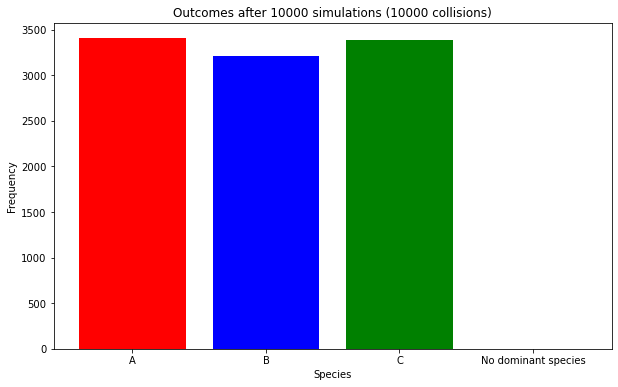

In [62]:
import random
import matplotlib.pyplot as plt

def run_simulation():
    # Initialise the number of particles for each species
    N_A = 3
    N_B = 3
    N_C = 0

    # Create an array for the particles
    X = ['A'] * N_A + ['B'] * N_B + ['C'] * N_C

    def collision(X):
        while True:
            i, j = random.sample(range(len(X)), 2)
            species_i, species_j = X[i], X[j]
            if species_i != species_j:
                if ('A' in [species_i, species_j]) and ('B' in [species_i, species_j]):
                    new_species = 'C'
                elif ('A' in [species_i, species_j]) and ('C' in [species_i, species_j]):
                    new_species = 'B'
                elif ('B' in [species_i, species_j]) and ('C' in [species_i, species_j]):
                    new_species = 'A'
                X[i], X[j] = new_species, new_species
                break
        return X

    # Simulate collisions
    total_collisions = 10000
    for _ in range(total_collisions):
        X = collision(X)
        if len(set(X)) == 1:
            break

    # Determine the final species if one exists
    if len(set(X)) == 1:
        return X[0]  # All particles are of the same species
    return 'No dominant species'  # if not retrun 'No single species dominated'

# Initialise counters for the outcomes
outcome_counts = {'A': 0, 'B': 0, 'C': 0, 'No dominant species': 0}

# Run the simulation 
num_simulations = 10000
for _ in range(num_simulations):
    outcome = run_simulation()
    outcome_counts[outcome] += 1
    
print("Outcomes after 10000 simulations:")
print("A:", outcome_counts['A'])
print("B:", outcome_counts['B'])
print("C:", outcome_counts['C'])
print("No dominant species:", outcome_counts['No dominant species'])



#PLotting on a bar chart

species_names = list(outcome_counts.keys())
counts = list(outcome_counts.values())


plt.figure(figsize=(10, 6))  
plt.bar(species_names, counts, color=['red', 'blue', 'green', 'purple'])  

plt.xlabel('Species')  
plt.ylabel('Frequency')  
plt.title('Outcomes after 10000 simulations (10000 collisions)')  
plt.show()
 
